In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## loading dataset from sklearn

In [2]:
from sklearn.datasets import load_boston

In [3]:
bos=load_boston()

d:\anaconda\envs\boston_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [4]:
bos.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
## checking description
print(bos.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(bos.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
print(bos.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### The data looks like a 2-d list with each row being describing chracteristics of one house and the characteristics names are stored in feature names. Using pandas its very easy to covert this into a dataframe. 

In [8]:
df=pd.DataFrame(bos.data, columns=bos.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### The target variable ie- Price is not present in the above dataframe and must be added.

In [9]:
df['Price']=bos.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### No null values are present.

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## EDA

In [13]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

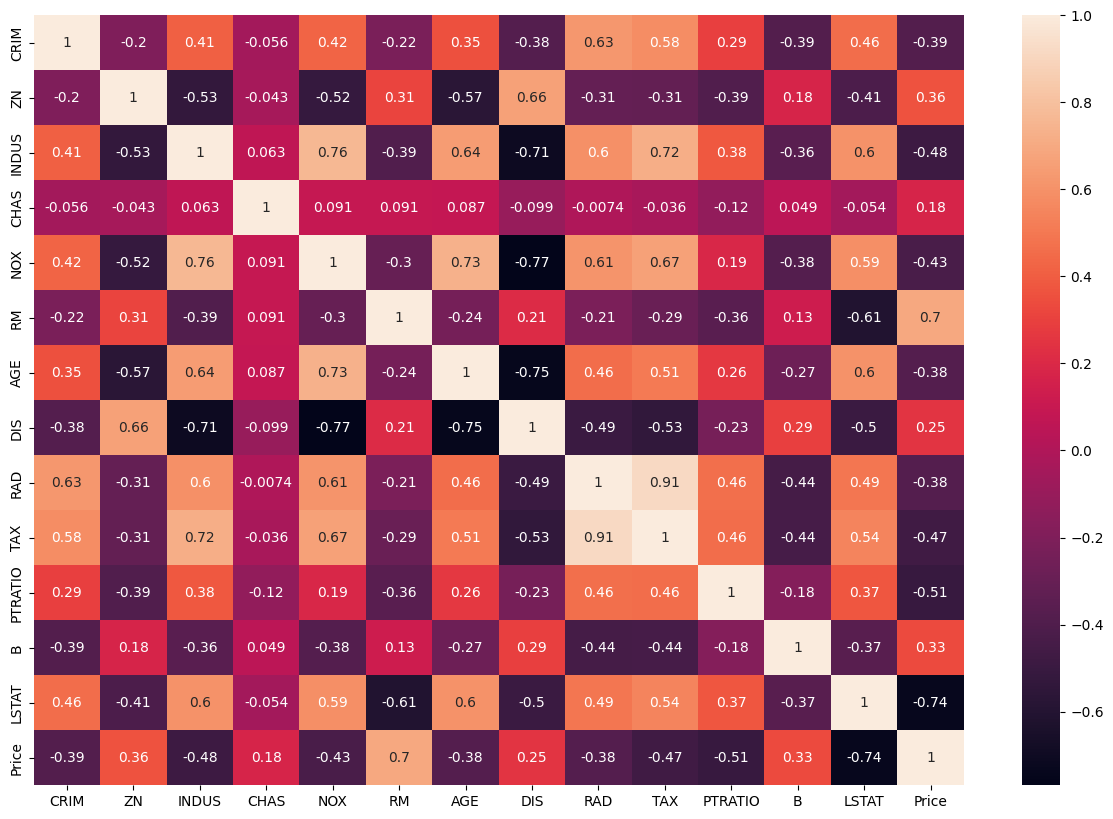

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

## we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with price

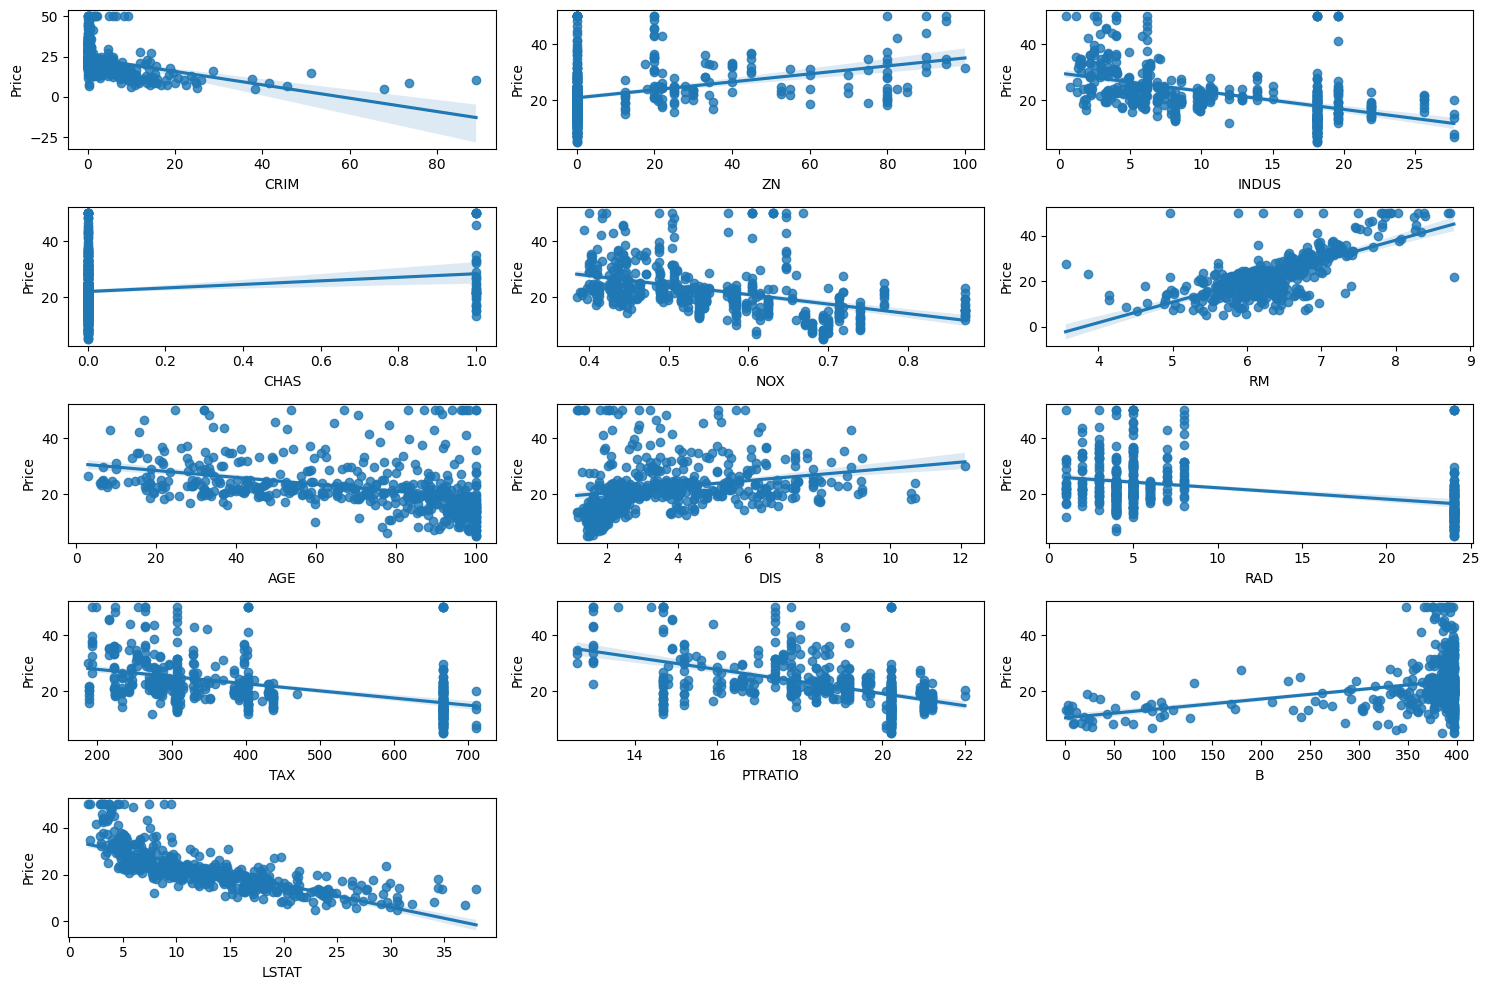

In [15]:
# Define number of rows and columns for subplots
ncols = 3
nrows = len(bos.feature_names) // ncols
if len(bos.feature_names) % ncols:
    nrows += 1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,10))

for idx, col in enumerate(bos.feature_names):
    ax = axes[idx // ncols, idx % ncols]
    sns.regplot(x=df[col], y=df['Price'], ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel("Price")

# Remove empty subplots if any
for idx in range(len(bos.feature_names), nrows*ncols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()


CHAS and Price have very less correlation. No linear relation

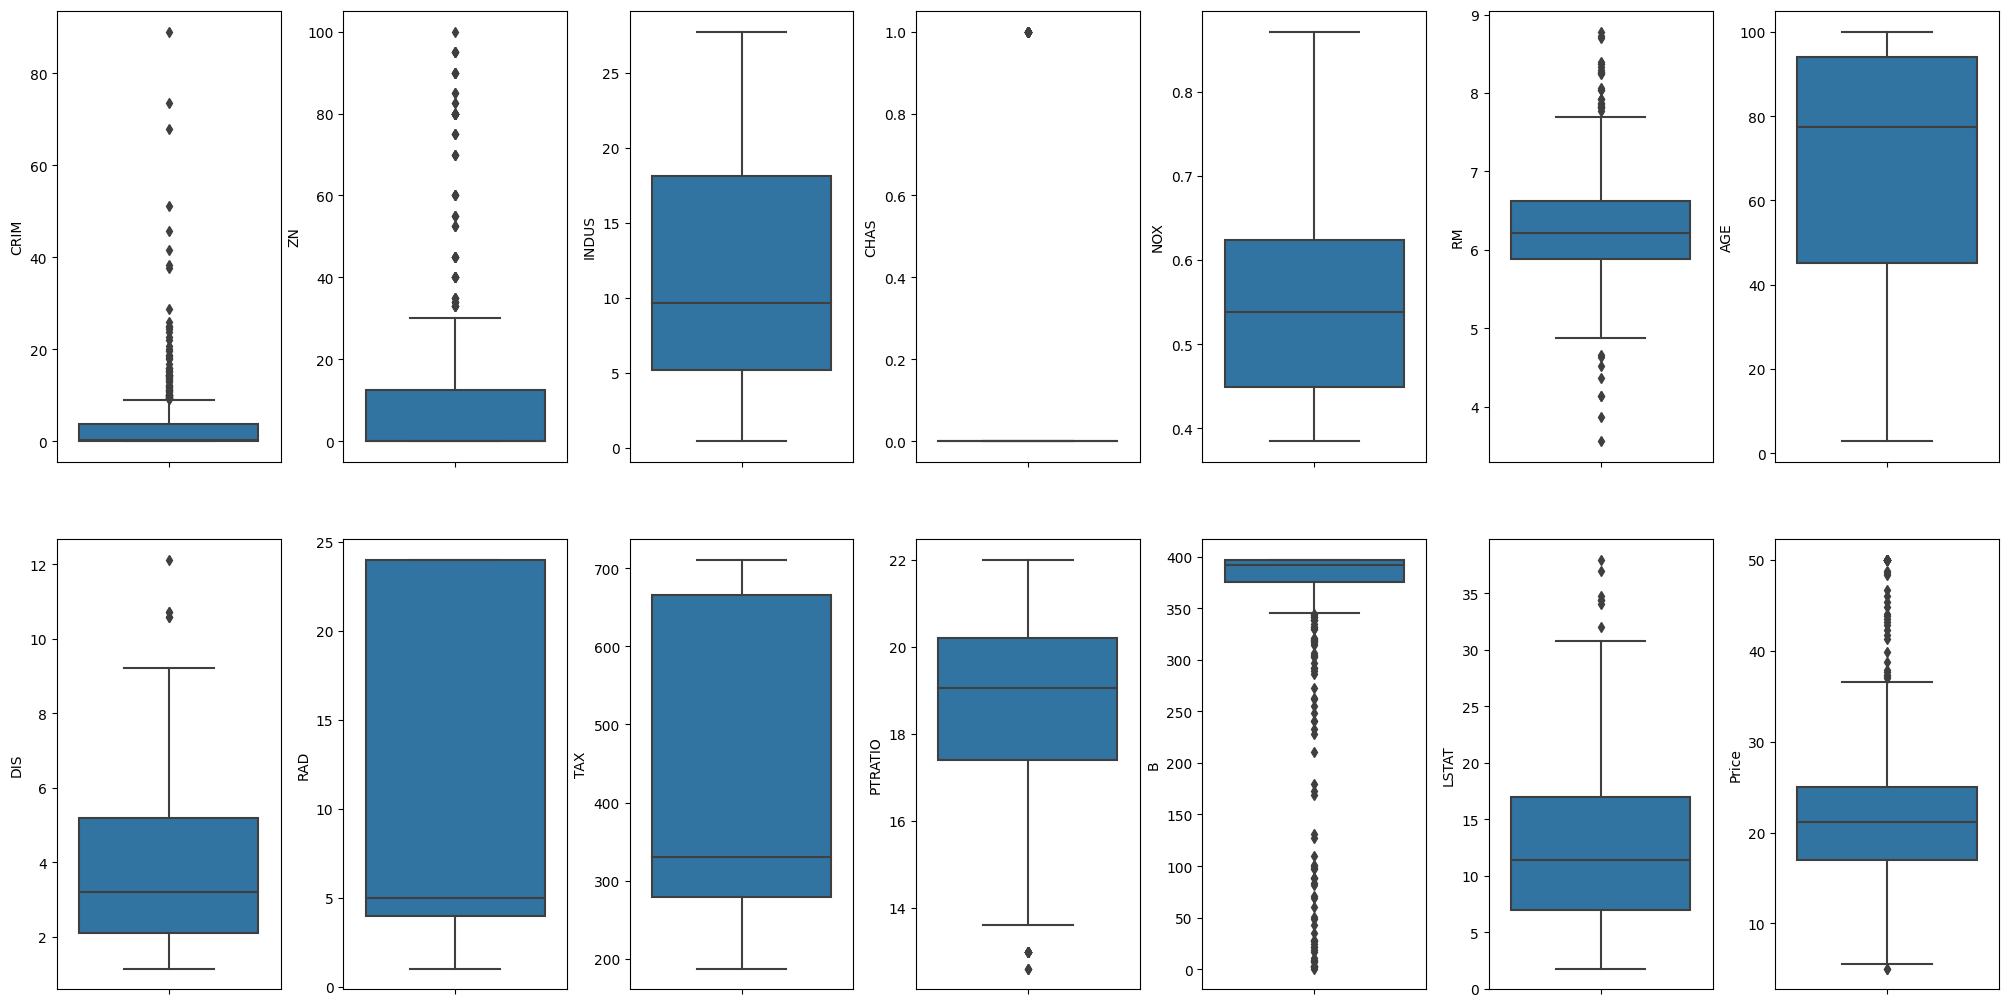

In [16]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [17]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column Price outliers = 7.91%


In [18]:
## Train test split

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [20]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86


In [21]:
''' Standard Scaling-In gradient descent we aim to come to global minima. And for that we need same scale for features. Also 
helpful to eliminate the bias that can be introduced when one feature has large values .
'''
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [22]:
X_train=scaler.fit_transform(X_train)

In [23]:
X_test=scaler.fit_transform(X_test)

In [24]:
import pickle 
pickle.dump(scaler,open('scaling.pkl','wb'))

## Model Training

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regression=LinearRegression()
regression.fit(X_train, y_train)
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [27]:
print("Intercept is", regression.intercept_)
print("Coefficients are", regression.coef_)

Intercept is 22.796534653465343
Coefficients are [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]


In [28]:
reg_pred=regression.predict(X_test)
reg_pred

array([31.35290844, 38.40284489, 16.55844736, 26.58918077, 19.91977056,
       25.1731892 , 19.37308702, 15.75969523, 24.33833186, 22.27543124,
       27.41402232, 20.8459715 , -6.20896092, 23.57543782, 20.54735122,
       27.65901059, 22.29464294,  6.47668542, 43.51769325, 18.65320174,
       28.94446425, 32.10558406, 12.40906454, 25.57699188, 18.88974664,
       16.83102191, 24.5039016 , 15.70326165, 24.46241833, 20.72338387,
       24.56515108, 26.74159446, 27.23281139, 18.4655718 , 18.03968805,
       19.12254074, 33.3933528 , 21.22303715, 25.76534897, 26.2579554 ,
       15.40075909, 34.23203047, 45.69799351, 18.76263812, 29.38156443,
       17.97525818, 15.14193938, 27.58190643, 21.55178037, 32.48247972,
       23.50448384, 37.00274292, 17.25100412, 27.75973646, 42.81276911,
       23.75468451, 19.94827814, 34.41733247, 26.88766714, 14.09034126,
       23.9718086 , 32.23755994, 33.59257448, 16.82852653, 21.64056532,
       18.57888398, 21.74112562, 27.57817327, 32.39925043, 12.58

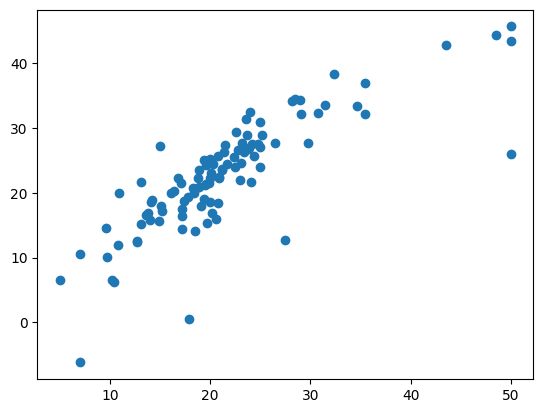

In [29]:
plt.scatter(y_test,reg_pred)

In [30]:
residual=y_test-reg_pred
residual

173    -7.752908
274    -6.002845
491    -2.958447
72     -3.789181
452    -3.819771
         ...    
412    17.433764
436    -5.020501
411    -0.277001
86     -1.532344
75     -4.932145
Name: Price, Length: 102, dtype: float64

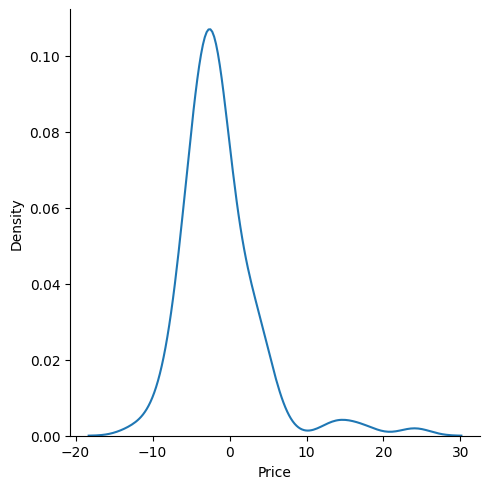

In [31]:
sns.displot(residual, kind="kde")

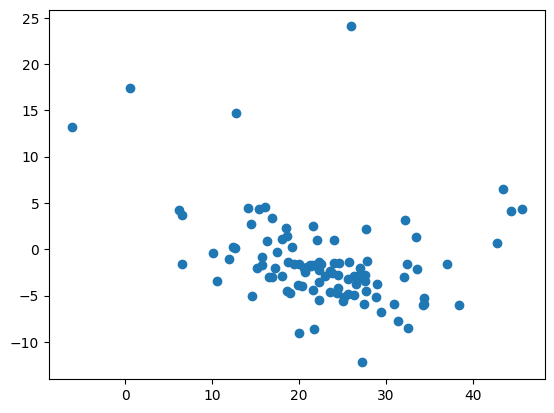

In [32]:
plt.scatter(reg_pred, residual)
# more points near 0

## Regression Metrics
Mean Absolute Error.
Mean Squared Error.
Root Mean Squared Error.
Root Mean Squared Logarithmic Error.
R Square.
Adjusted R Square

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))


3.852621850530128
27.406836284337263


In [34]:
from sklearn.metrics import r2_score
print(r2_score(y_test,reg_pred))

0.6262727067493545


In [35]:
pip install lime shap

  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 461.3/461.3 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 12.1/12.1 MB 7.4 MB/s eta 0:00:00
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
     ---------------------------------------- 2.5/2.5 MB 2.6 MB/s eta 0:00:00
     ------------------------------------- 313.2/313.2 kB 18.9 MB/s eta 0:00:00
     ---------------------------------------- 178.9/178.9 kB ? eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 26.6 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 24.3 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 6.9 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=2c02eb

In [36]:
from sklearn.ensemble import RandomForestRegressor


RF = RandomForestRegressor(random_state=42)
RF.fit(X_train, y_train)

# Use the model to predict, not the class
RF_pred = RF.predict(X_test)
print(r2_score(y_test, RF_pred))


0.8590432499234434


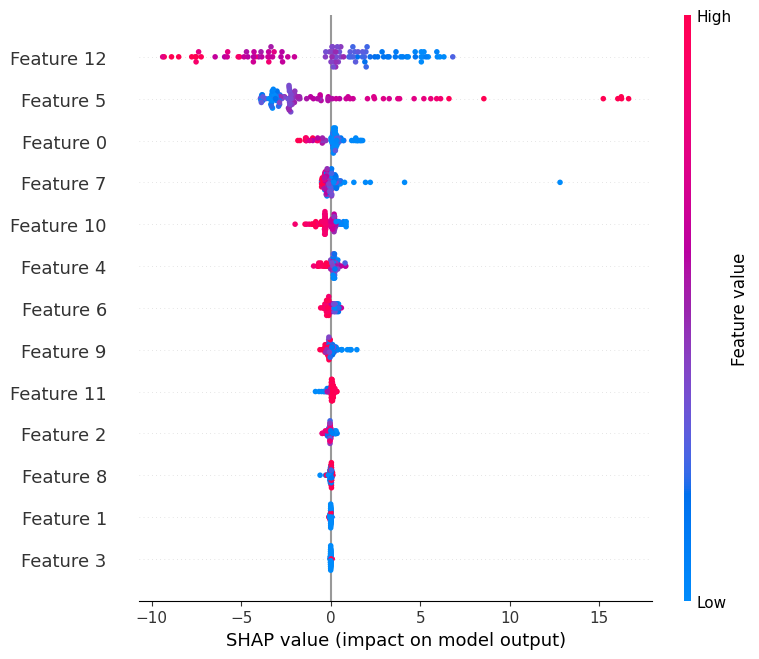

In [38]:
import shap

# Initialize a TreeExplainer and calculate shap values
explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)


In [40]:
import lime
import lime.lime_tabular

feature_names = bos.feature_names

# Create a Lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = X_train,  
    feature_names = feature_names,  
    mode = 'regression'
)

exp = explainer.explain_instance(
    X_test[0], 
    RF.predict,
    num_features = 5
)

exp.show_in_notebook(show_table=True, show_all=False)


In [41]:
bos.data[0].reshape(1,-1).shape

(1, 13)

In [42]:
RF.predict(bos.data[0].reshape(1,-1))

array([28.381])

In [43]:
pickle.dump(RF,open('RandomForest.pkl','wb'))

In [44]:
pickled_model=pickle.load(open('RandomForest.pkl', 'rb'))

In [45]:
## checked pickled model

pickled_model.predict(bos.data[0].reshape(1,-1))

array([28.381])